Replicate Eduardo's C++ results from 10/2

In [1]:
import numpy as np
from CTRNNclass import *
from rateofchangefitness import *
from SampleGenerators import randomCTRNNsample
from HPevolution import *
from acceptance import *

In [2]:
dt = .1
HPgenome3 = np.array([.1,.1,.1,.9,.9,.9,40,20,12/dt])            #3 neurons
HPgenome4 = np.array([.1,.1,.1,.1,.9,.9,.9,.9,40,20,12/dt])      #4 neruons
HPgenome5 = np.array([.1,.1,.1,.1,.1,.9,.9,.9,.9,.9,40,20,12/dt])#5 neurons

In [13]:
popsize = 10
CTRNNsample = randomCTRNNsample(3,popsize,1)

The new protocol for evaluating fitness: 
- For each “global temperature” between -1 and 1 in steps of 0.1, I repeat the following steps:  
- Create CTRNN and set parameters according to the genotype-phenotype encoding
- Alter the biases and weights according to the global temperature T, p* = p + T
- Initialize state of all neurons by setting their output to 0.5
- Let transients pass for 200 units of time without HP.
- Evaluate performance for 200 units of time without HP 
- Turn HP mechanism on. 

- *Could add:* 200 units of transient time with HP on


- Evaluate performance for 200 units of time with HP on. 

In [18]:
temp_range = [-1,1]
temp_step = .5
temp_direction = np.ones(N**2+(2*N))
temp_direction[-N:] = 0 #not changing time constants with temperature

def fitnessfunc(neurongenome):
    fitness = 0
    templist = np.linspace(temp_range[0],temp_range[1],num=5)
    for temp in templist:
        CTRNNgenome = neurongenome + temp_direction*temp
        fitness += roc_fitness2(neurongenome,HPgenome3)
    return fitness/len(templist)

In [19]:
generations = 50
recombprob = .25
mutatprob = .25

M = MicrobialCTRNN(fitnessfunc,CTRNNsample,recombprob,mutatprob,generations)
M.run()

print('Success')


0
9.06623120960284
20
9.242848573201709
40
9.242848573201709
Success


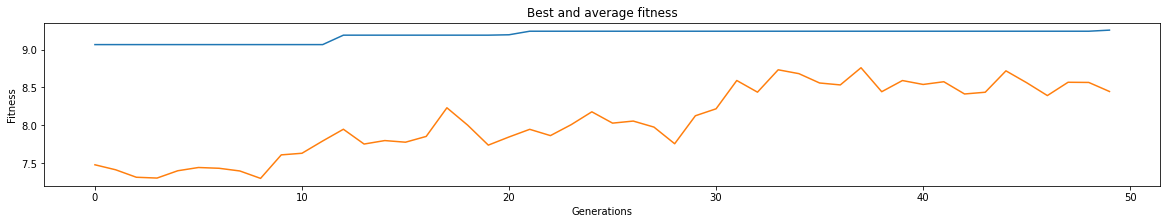

In [20]:
M.showFitness()

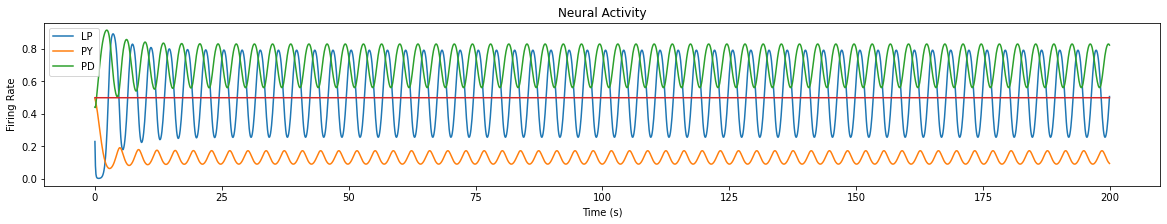

preHPfitness= 9.990143618059545


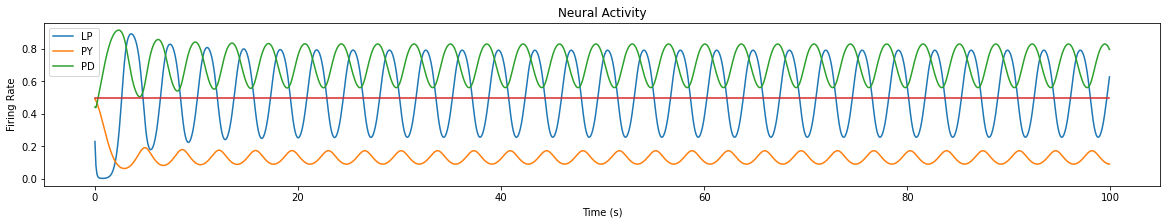

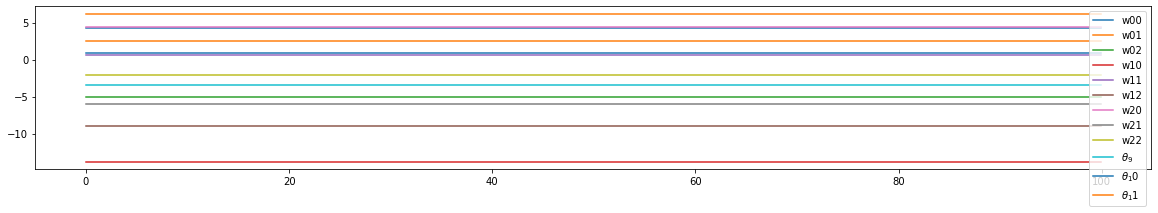

HPonfitness= 8.524288538948534


9.25721607850404

In [21]:
bestind = M.pop[np.argmax(M.fitness)]
roc_fitness2(bestind,HPgenome3,plotting=True)

After a successful evolutionary run, I take the best evolved circuit and I evaluated using the following protocol: 
- For each “global temperature” between -1 and 1 in steps of 0.05, I repeat the following steps:  
- Set parameters of the CTRNN accordingly.
- Initialize output of all neurons to 0.5
- Let transients pass for 200 units of time without HP.
- Evaluate performance for 1000 units of time without HP (blue points).
- Turn HP mechanism on. 
- Evaluate performance for 1000 units of time (with HP on) (yellow points).
- Turn HP mechanism back off. 
- Evaluate performance for 1000 units of time (again without HP) (green points).

In [ ]:
#test whether changing the variables transientdur and testdur in this notebook affects the function
transient = int(200/dt) #in timesteps
testdur = int(1000/dt)    #in timesteps
roc_fitness2(bestind,HPgenome3,plotting=True)

In [28]:
#redefine different function to give correct outputs
print(bestind)
transient = int(200/dt) #in timesteps
testdur = int(1000/dt)    #in timesteps

def long_roc_fitness(neurongenome,HPgenome,plotting=False):
    C = CTRNN(N,dt,(transient*dt)+3*(testdur*dt),HPgenome,neurongenome) 
    C.initializeOutput(np.ones(N)*.5)
    C.resetStepcount()
    for i in range(transient+testdur):
        C.ctrnnstep(0) #HP off
    preHPfitness = K
    for n in range(N):
        acc_roc = np.sum(np.abs(np.diff(C.ctrnn_record[-3*testdur:-2*testdur])))/dt
        preHPfitness -= np.abs(target[n]-(acc_roc/testdur))
    for i in range(testdur):
        C.ctrnnstep(1) #HP on
    HPonfitness = K
    for n in range(N):
        acc_roc = np.sum(np.abs(np.diff(C.ctrnn_record[-2*testdur:-testdur])))/dt
        HPonfitness -= np.abs(target[n]-(acc_roc/testdur))
    for i in range(testdur):
        C.ctrnnstep(0)  #HP back off
    HPbackofffitness = K
    for n in range(N):
        acc_roc = np.sum(np.abs(np.diff(C.ctrnn_record[-testdur:])))/dt
        HPonfitness -= np.abs(target[n]-(acc_roc/testdur))
    if plotting:
        C.plot()
        C.plotparams()
        print('preHPfitness=',preHPfitness,'HPonfitness=',HPonfitness,'HPbackofffitness=',HPbackofffitness)
    return preHPfitness,HPonfitness,HPbackofffitness

[  4.217626     2.47999084  -5.02808558 -13.85937182   0.65323555
  -8.99591039   4.450569    -6.04286179  -2.05842249  -3.4344038
   0.8961329    6.18813219   0.5          1.98251343   0.79386923]


32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000
32000


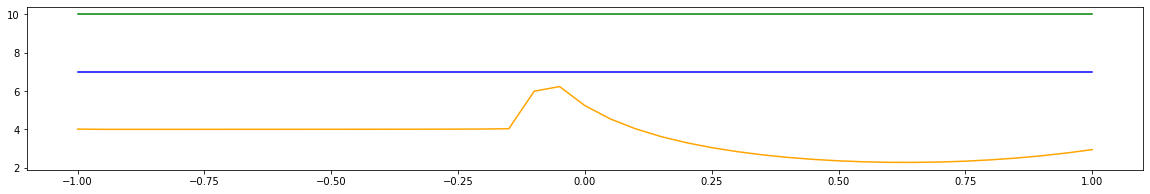

In [29]:
templist = np.arange(temp_range[0],temp_range[1]+.0001,.05)

results = np.zeros((3,len(templist)))

for i in range(len(templist)):
    CTRNNgenome = bestind + temp_direction*templist[i]
    results[:,i] = long_roc_fitness(CTRNNgenome,HPgenome3)


In [30]:
results[1]

array([4.01915205, 4.00685977, 4.00678446, 4.00690429, 4.00710748,
       4.00736659, 4.00772399, 4.00819596, 4.00871581, 4.00929001,
       4.00993912, 4.01071179, 4.01167277, 4.01295211, 4.01480267,
       4.01773878, 4.02332679, 4.03951519, 5.99122412, 6.2321787 ,
       5.23934443, 4.54870543, 4.03217333, 3.63040605, 3.31172038,
       3.05466449, 2.84758299, 2.68018118, 2.54677691, 2.44473311,
       2.36836172, 2.31749331, 2.28962247, 2.28764677, 2.30661886,
       2.35014745, 2.41989954, 2.51273688, 2.63182568, 2.77751755,
       2.95143582])

In [ ]:

plt.plot(templist,results[0],color='blue')
plt.plot(templist,results[1],color='orange')
plt.plot(templist,results[2],color='green')
plt.show()

In [ ]:
accepthistory = np.zeros(generations)

for i in range(generations):
    accepthistory[i]=acceptance(HPgenome3,M.bestindHistory[i])

print(accepthistory)

AttributeError: 'MicrobialCTRNN' object has no attribute 'bestindHistory'